<a href="https://colab.research.google.com/github/tirals88/Alone-ML-DL/blob/main/1%EC%9E%A5_3%EC%A0%88%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'혼자 공부하는 머신러닝 + 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/rickiepark/hg-mldl'

**혼자 공부하는 머신러닝+딥러닝**

https://hanbit.co.kr/store/books/look.php?p_code=B2002963743

01 ~ 06 머신러닝 파트  
07 ~ 09 딥러닝 파트

# 01-1 인공지능과 머신러닝, 딥러닝

영화와 소설, 드리마 등에서 인공지능 시스템은 흔하지만, 실생활에서 체험하기에는 아직 어렵다.<br/>이는 영화와 현실에서의 두 기술이 다르기 때문이다.

흔히 영화속에서 다루는 인공지능은 **인공일반지능 artificial general intelligence**, 혹은 **강인공지능 Strong AI**이라고 부르는 인공지능이다.
- 사람과 구분하기 어려운 지능을 가진 컴퓨터 시스템이 인공일반지능이다.

반면 현실에서 우리가 마주하고 있는 인공지능은 **약인공지능 Weak AI**이다.<br/>이는 특정분야에서 사람의 보조 역할을 한다.
- 이의 예시가 자율 주행, 음악 추천, 기계 번역, 알파고이다.

## 머신러닝이란

머신러닝 machine learning은 규칙을 **일일이 프로그래밍하지 않아도 자동으로** 데이터에서 규칙을 학습하는 알고리즘을 연구하는 분야이다.<br/>컴퓨터 과학 분야의 대표적인 머신러닝 라이브러리는 **사이킷런 scikit-learn**이다.

이 책에서는 1장부터 6장까지 사이킷런에 포함된 다양한 머신러닝 알고리즘을 배울 것이다.

## 딥러닝이란

많은 머신러닝 알고리즘 중에서 **인공 신경망 artificial neural network**을 기반으로 한 방법들을 통칭하여 **딥러닝 Deep learning**이라고 부른다.

인공 신경망이 이전과 다르게 놀라운 성능을 달성하게 된 원동력으로 크게 세가지를 꼽을 수 있다.

- 풍부한 데이터
- 컴퓨터 성능의 향상
- 혁신적인 알고리즘 개발

딥러닝 라이브러리로는 구글의 **텐서플로우 TensorFlow**, 페이스북의 **파이토치 PyTorch**가 있다.

# 01-3 생선 분류 문제

- 여러개의 도미 생선을 보면 스스로 어떤 생선이 도미인지 구분할 기준을 찾는다.
- 35 마리의 도미의 길이와 무게 데이터 준비

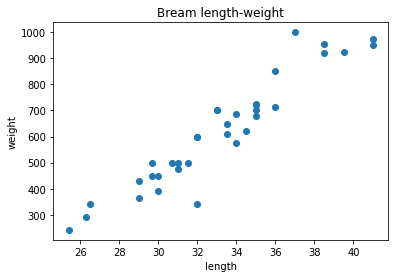

In [1]:
import matplotlib.pyplot as plt

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# scatter plot

plt.scatter(bream_length, bream_weight)
plt.title('Bream length-weight')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 14 마리의 빙어 데이터 준비

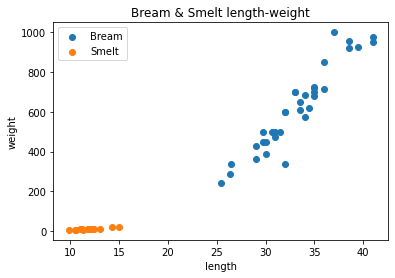

In [2]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight, label = 'Bream')
plt.scatter(smelt_length, smelt_weight, label = 'Smelt')
plt.title('Bream & Smelt length-weight')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## k-최근접 이웃 k-Nearest Neighbors 알고리즘

- 두 데이터를 하나의 데이터로 합침 (총 데이터의 길이는 각 49개)
- 이 두 데이터를 2차원 데이터로 변환

In [3]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# zip() 함수와 리스트 내포 구문을 사용해 2차원 리스트 생성

fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [4]:
# 정답 데이터 준비
# 도미 = 1, 빙어 = 0 으로 설정

fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
# k-최근접 이웃 알고리즘을 구현한 클래스인 KNeightborsClassifier

from sklearn.neighbors import KNeighborsClassifier

#KNeighborsClassifier 클래스의 객체를 생성

kn = KNeighborsClassifier()

# fit() 메서드로 훈련

kn.fit(fish_data, fish_target)

# score() 메서드로 훈련 평가 (0 ~ 1 사이의 값을 반환)
kn.score(fish_data, fish_target)

1.0

## k-최근접 이웃 알고리즘

어떠한 데이터에 대한 답을 구할 떄 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다.
- 주위의 데이터로 현재 데이터를 판단
- 새로운 데이터에 대한 예측학 때는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면 된다.
- 단점은 데이터가 아주 많은 경우 사용하기 어렵다.

30cm / 600g 의 생선을 판단 예시

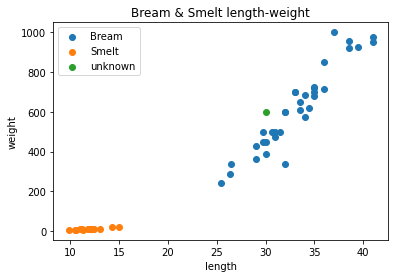

unkown data predict


array([1])

In [6]:
plt.scatter(bream_length, bream_weight, label = 'Bream')
plt.scatter(smelt_length, smelt_weight, label = 'Smelt')
plt.scatter([30], [600], label = 'unknown')
plt.title('Bream & Smelt length-weight')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

print('unkown data predict')
kn.predict([[30, 600]])

In [7]:
# _fit_x 에 fish_data를 모두 가지고 있다
# _y 에 fish_target을 모두 가지고 있다.

print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


### 고찰

실제로 k-최근접 이웃 알고리즘은 무언가 훈련되는 게 없는 셈이다. 그저 가장 가까운 데이터를 참고하는 것 뿐이다.

그럼 가까운 몇 개의 데이터를 참고하는가? 이는 정하기 나름이다. KNeighborsClassifier 클래스의 기본값은 5 이다. 이 기준은 n_neighbors 매개변수로 바꿀 수 있다.

In [8]:
kn49 = KNeighborsClassifier(n_neighbors=49) # 참고 데이터를 49개로 한 kn49 모델

kn49.fit(fish_data, fish_target)
print(kn49.score(fish_data, fish_target))
print(kn49.score(fish_data[:35], fish_target[:35]))
print(kn49.score(fish_data[35:], fish_target[35:]))
sub_data = fish_data[30:40]
sub_target = fish_target[30:40]
print(kn49.score(sub_data, sub_target))

print(35/49) # 35 마리의 도미만을 제대로 맞추었음을 확인

0.7142857142857143
1.0
0.0
0.5
0.7142857142857143


In [14]:
# 그럼 과연 n_neighbors 가 몇이 되는 순간 부터 점수가 1.0 이하로 떨어지는지 찾고자 할 때,
# KNeighborsClassifier 클래스 객체를 매번 다시 만들 필요는 없다.
# 심지어 fit() 메서드도 훈련을 다시 할 필요가 없다. 훈련이 데이터를 저장하는 것 뿐이기 때문이다.

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
  # k-최근접 이웃 개수 설정
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)
  if score < 1:
    print(n, score)
    kn.n_neighbors = n-1
    score = kn.score(fish_data, fish_target)
    print(n-1, score)
    break

18 0.9795918367346939
17 1.0
